In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

## 缺失数据处理
1 []
3 []
4 ''
5 x
6 x
8 ''
10 x
11 []
12 []
14 插值？
15 []
17 怎么处理？
19 []
20 21 怎么处理？

In [4]:
train.rename(columns={'belongs_to_collection': 'belongs-to-collection', 'imdb_id': 'imdb-id', 'original_language': 'original-language', 'original_title': 'original-title', 'poster_path': 'poster-path', 'production_companies': 'production-companies', 'production_countries': 'production-countries', 'release_date': 'release-date', 'spoken_languages': 'spoken-languages'}, inplace=True)
test.rename(columns={'belongs_to_collection': 'belongs-to-collection', 'imdb_id': 'imdb-id', 'original_language': 'original-language', 'original_title': 'original-title', 'poster_path': 'poster-path', 'production_companies': 'production-companies', 'production_countries': 'production-countries', 'release_date': 'release-date', 'spoken_languages': 'spoken-languages'}, inplace=True)
def fillna(data):
    fillna_dict = {
        'belongs-to-collection': '[]',
        'genres': '[]',
        'homepage': "",
        'overview': "",
        'production-companies': '[]',
        'production-countries': '[]',
        'spoken-languages': '[]',
        'Keywords': '[]',
        'tagline': '',
        'cast': '[]',
        'crew': '[]',
        'status': '',
        'title': ''
    }
    data.fillna(fillna_dict, inplace=True)
    data['runtime'].interpolate(method='values', inplace=True)
    
fillna(train)
fillna(test)
test.loc[828, 'release-date'] = '5/1/00' # search from google

In [5]:
train.drop(['poster-path', 'imdb-id'], axis=1, inplace=True)
test.drop(['poster-path', 'imdb-id'], axis=1, inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs-to-collection  3000 non-null   object 
 2   budget                 3000 non-null   int64  
 3   genres                 3000 non-null   object 
 4   homepage               3000 non-null   object 
 5   original-language      3000 non-null   object 
 6   original-title         3000 non-null   object 
 7   overview               3000 non-null   object 
 8   popularity             3000 non-null   float64
 9   production-companies   3000 non-null   object 
 10  production-countries   3000 non-null   object 
 11  release-date           3000 non-null   object 
 12  runtime                3000 non-null   float64
 13  spoken-languages       3000 non-null   object 
 14  status                 3000 non-null   object 
 15  tagl

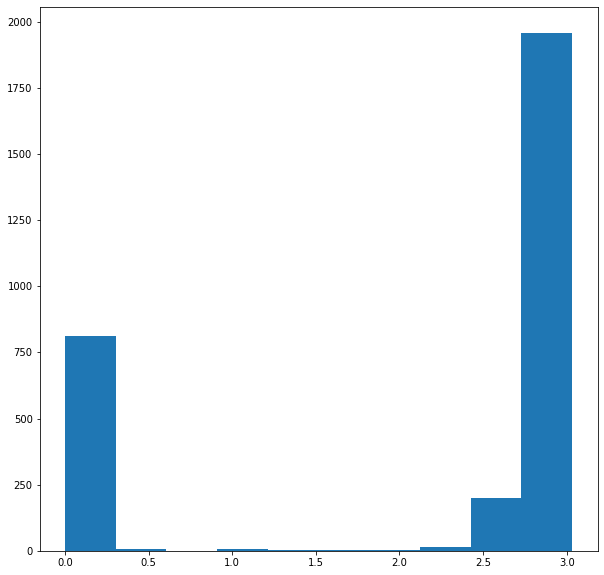

In [7]:
train['log-budget'] = np.log1p(train['budget'])
test['log-budget'] = np.log1p(test['budget'])
plt.figure(figsize=(10, 10))
plt.hist(np.log1p(train['log-budget']))
plt.show()
# train['log-budget'].corr(np.log1p(train['revenue']))

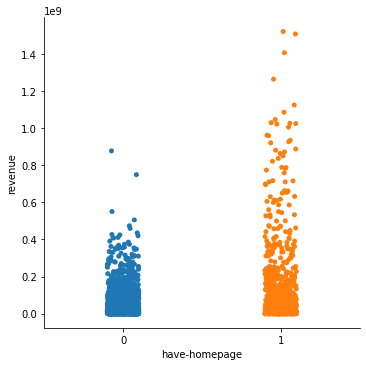

In [8]:
train['have-homepage'] = train['homepage'].map(lambda x: 1 if x != '' else 0)
test['have-homepage'] = test['homepage'].map(lambda x: 1 if x != '' else 0)
sns.catplot(x='have-homepage', y='revenue', data=train)

In [9]:
train['release-date'] = train['release-date'].map(lambda x: pd.to_datetime(x))
train['year'] = train['release-date'].map(lambda x: x.year)
train['month'] = train['release-date'].map(lambda x: x.month)
train['day'] = train['release-date'].map(lambda x: x.day)
train['quarter'] = train['release-date'].map(lambda x: x.quarter)
train['week'] = train['release-date'].map(lambda x: x.dayofweek + 1)

test['release-date'] = test['release-date'].map(lambda x: pd.to_datetime(x))
test['year'] = test['release-date'].map(lambda x: x.year)
test['month'] = test['release-date'].map(lambda x: x.month)
test['day'] = test['release-date'].map(lambda x: x.day)
test['quarter'] = test['release-date'].map(lambda x: x.quarter)
test['week'] = test['release-date'].map(lambda x: x.dayofweek + 1)

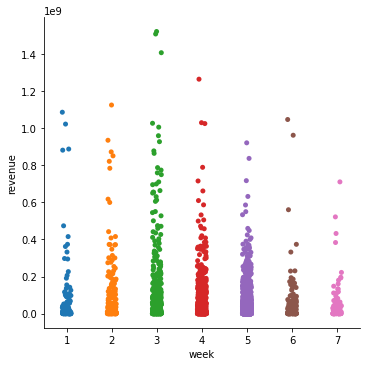

In [10]:
sns.catplot(x='week', y='revenue', data=train)
plt.show()

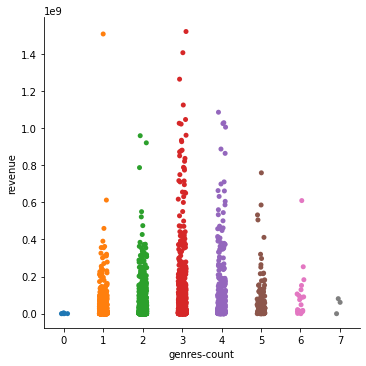

In [11]:
train['genres-count'] = train['genres'].map(lambda x: len(eval(x)))
test['genres-count'] = test['genres'].map(lambda x: len(eval(x)))
sns.catplot(x='genres-count', y='revenue', data=train)
plt.show()

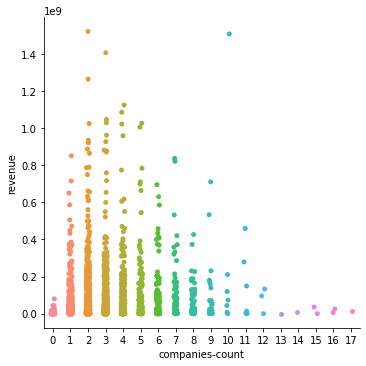

In [12]:
train['companies-count'] = train['production-companies'].map(lambda x: len(eval(x)))
test['companies-count'] = test['production-companies'].map(lambda x: len(eval(x)))
sns.catplot(x='companies-count', y='revenue', data=train)
plt.show()

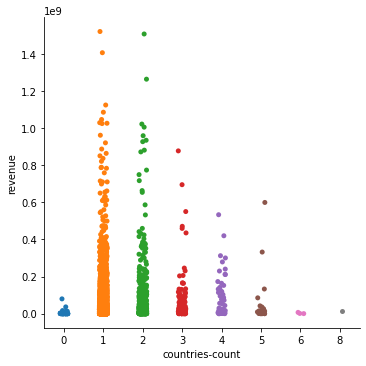

In [13]:
train['countries-count'] = train['production-countries'].map(lambda x: len(eval(x)))
test['countries-count'] = test['production-countries'].map(lambda x: len(eval(x)))
sns.catplot(x='countries-count', y='revenue', data=train)
plt.show()

In [14]:
train['cast-count'] = train['cast'].map(lambda x: len(eval(x)))
test['cast-count'] = test['cast'].map(lambda x: len(eval(x)))
train['crew-count'] = train['crew'].map(lambda x: len(eval(x)))
test['crew-count'] = test['crew'].map(lambda x: len(eval(x)))


In [15]:
train.drop(['homepage', 'release-date', 'status', 'belongs-to-collection'], axis=1, inplace=True)
test.drop(['homepage', 'release-date', 'status', 'belongs-to-collection'], axis=1, inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3000 non-null   int64  
 1   budget                3000 non-null   int64  
 2   genres                3000 non-null   object 
 3   original-language     3000 non-null   object 
 4   original-title        3000 non-null   object 
 5   overview              3000 non-null   object 
 6   popularity            3000 non-null   float64
 7   production-companies  3000 non-null   object 
 8   production-countries  3000 non-null   object 
 9   runtime               3000 non-null   float64
 10  spoken-languages      3000 non-null   object 
 11  tagline               3000 non-null   object 
 12  title                 3000 non-null   object 
 13  Keywords              3000 non-null   object 
 14  cast                  3000 non-null   object 
 15  crew                 

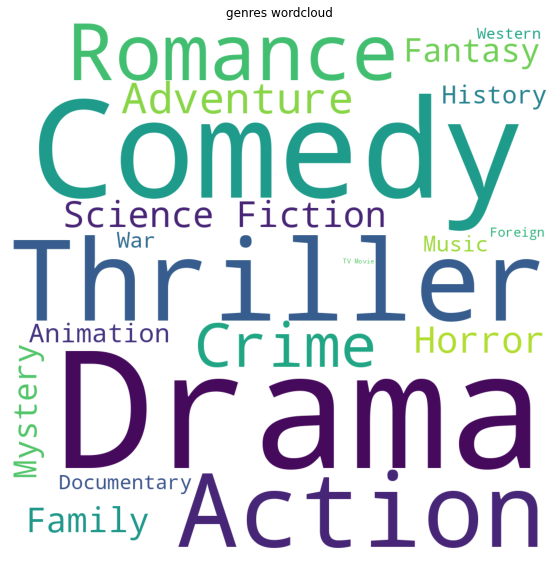

In [17]:
from wordcloud import WordCloud
genres_dict = {}
for val in train['genres']:
    for v in eval(val):
        if v['name'] not in genres_dict.keys():
            genres_dict[v['name']] = 1
        else:
            genres_dict[v['name']] += 1
wc = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(genres_dict)
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.title('genres wordcloud')
plt.show()

In [18]:
train['genres-all'] = train['genres'].map(lambda x: ''.join([v['name'] for v in eval(x)]))
test['genres-all'] = test['genres'].map(lambda x: ''.join([v['name'] for v in eval(x)]))
top_genres = ['Comedy', 'Romance', 'Action', 'Drama', 'Thriller']
for genres in top_genres:
    train['genres-' + genres] = train['genres'].map(lambda x: 1 if genres in x else 0)
    test['genres-' + genres] = test['genres'].map(lambda x: 1 if genres in x else 0)


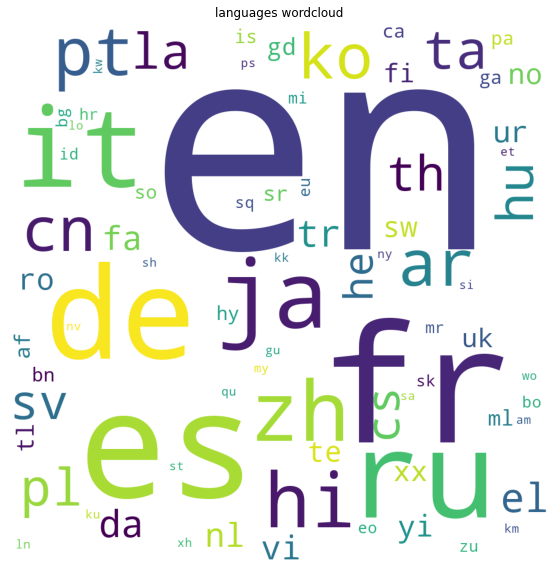

In [19]:
languages_dict = {}
for val in train['spoken-languages']:
    for v in eval(val):
        if v['iso_639_1'] not in languages_dict.keys():
            languages_dict[v['iso_639_1']] = 1
        else:
            languages_dict[v['iso_639_1']] += 1
wc = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(languages_dict)
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.title('languages wordcloud')
plt.show()

In [20]:
train['languages-all'] = train['spoken-languages'].map(lambda x: ''.join([v['iso_639_1'] + ' ' for v in eval(x)]))
test['languages-all'] = test['spoken-languages'].map(lambda x: ''.join([v['iso_639_1'] + ' ' for v in eval(x)]))
top_languages = ['en', 'fr', 'it', 'de', 'es', 'ru', 'zh', 'ja']
for language in top_languages:
    train['languages-' + language] = train['languages-all'].map(lambda x: 1 if language in x else 0)
    test['languages-' + language] = test['languages-all'].map(lambda x: 1 if language in x else 0)


In [21]:
train.drop(['genres', 'original-language', 'production-companies', 'production-countries', 'spoken-languages'], axis=1, inplace=True)
test.drop(['genres', 'original-language', 'production-companies', 'production-countries', 'spoken-languages'], axis=1, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3000 non-null   int64  
 1   budget           3000 non-null   int64  
 2   original-title   3000 non-null   object 
 3   overview         3000 non-null   object 
 4   popularity       3000 non-null   float64
 5   runtime          3000 non-null   float64
 6   tagline          3000 non-null   object 
 7   title            3000 non-null   object 
 8   Keywords         3000 non-null   object 
 9   cast             3000 non-null   object 
 10  crew             3000 non-null   object 
 11  revenue          3000 non-null   int64  
 12  log-budget       3000 non-null   float64
 13  have-homepage    3000 non-null   int64  
 14  year             3000 non-null   int64  
 15  month            3000 non-null   int64  
 16  day              3000 non-null   int64  
 17  quarter       

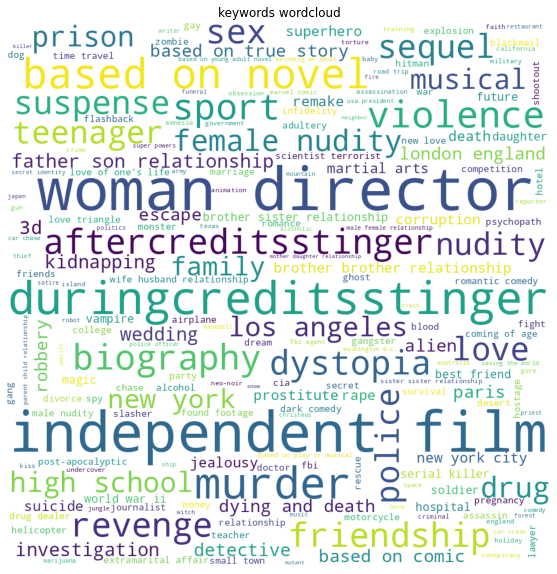

In [22]:
keywords_dict = {}
for val in train['Keywords']:
    for v in eval(val):
        if v['name'] not in keywords_dict.keys():
            keywords_dict[v['name']] = 1
        else:
            keywords_dict[v['name']] += 1
wc = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(keywords_dict)
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.title('keywords wordcloud')
plt.show()

In [23]:
train_texts = train[['original-title', 'overview', 'tagline', 'title', 'Keywords']]
test_texts = test[['original-title', 'overview', 'tagline', 'title', 'Keywords']]
for col in ['original-title', 'overview', 'tagline', 'title', 'Keywords']:
    train['words-' + col] = train[col].map(lambda x: len(str(x)))
    test['words-' + col] = test[col].map(lambda x: len(str(x)))
train.drop(['original-title', 'overview', 'tagline', 'title', 'Keywords'], axis=1, inplace=True)
test.drop(['original-title', 'overview', 'tagline', 'title', 'Keywords'], axis=1, inplace=True)

In [24]:
train.drop(['cast', 'crew'], axis=1, inplace=True)
test.drop(['cast', 'crew'], axis=1, inplace=True)

In [25]:
train.drop(['genres-all', 'languages-all'], axis=1, inplace=True)
test.drop(['genres-all', 'languages-all'], axis=1, inplace=True)

In [26]:
train_x = train.drop(['id', 'revenue'], axis=1)
train_y = np.log1p(train['revenue'])

In [27]:
test_x = test.drop(['id'], axis=1)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10)
rfr = RandomForestRegressor(n_estimators=150)
rmse_score = cross_val_score(rfr, train_x, train_y, scoring='neg_mean_squared_error', cv=kfold)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR = LinearRegression()
scores = cross_val_score(LR, train_x, train_y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
rmse.mean()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
scores = cross_val_score(rfr, train_x, train_y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
rmse.mean()

In [ ]:
rfr.fit(train_x, train_y)
pred_test_y = rfr.predict(test_x)
pred_test_y

In [ ]:
from sklearn.model_selection import train_test_split
X = train_x
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, train_size=0.9)

In [ ]:
df = pd.DataFrame(pred_test_y.T, columns=['log-revenue'])
df['revenue'] = np.expm1(df['log-revenue'])
df['id'] = test['id']
dff = df[['id', 'revenue']].astype(int)

In [ ]:
dff.to_csv('submission1.csv', index=False)